In [1]:
import glob
import os

import cv2
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt

In [2]:
import torch
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm.notebook import tqdm
import random

In [3]:
from dataloader_hnet_FL import TUSimpleHNet
from lanenet_hnet_model2 import HNet
from hnet_loss3 import HNetLoss

In [4]:
def same_seed(seed=42):
    np.random.seed(seed)  # Numpy module.
    random.seed(seed)  # Python random module.
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
#same_seed(42) not fixed seeds for training

In [5]:
def init_all(model, init_func, *params, **kwargs):
    for p in model.parameters():
        init_func(p, *params, **kwargs)

### Check Dataset

In [6]:
dataset = TUSimpleHNet("data/train_set")
train_set, val_set = torch.utils.data.random_split(dataset, [3216, 410])
random_sample = dataset[random.randint(0,len(train_set)-1)]

In [7]:
print(len(val_set))

410


In [8]:
image = random_sample[0][0]
lane_pair = random_sample[1] 
lane_cnt = len(lane_pair)

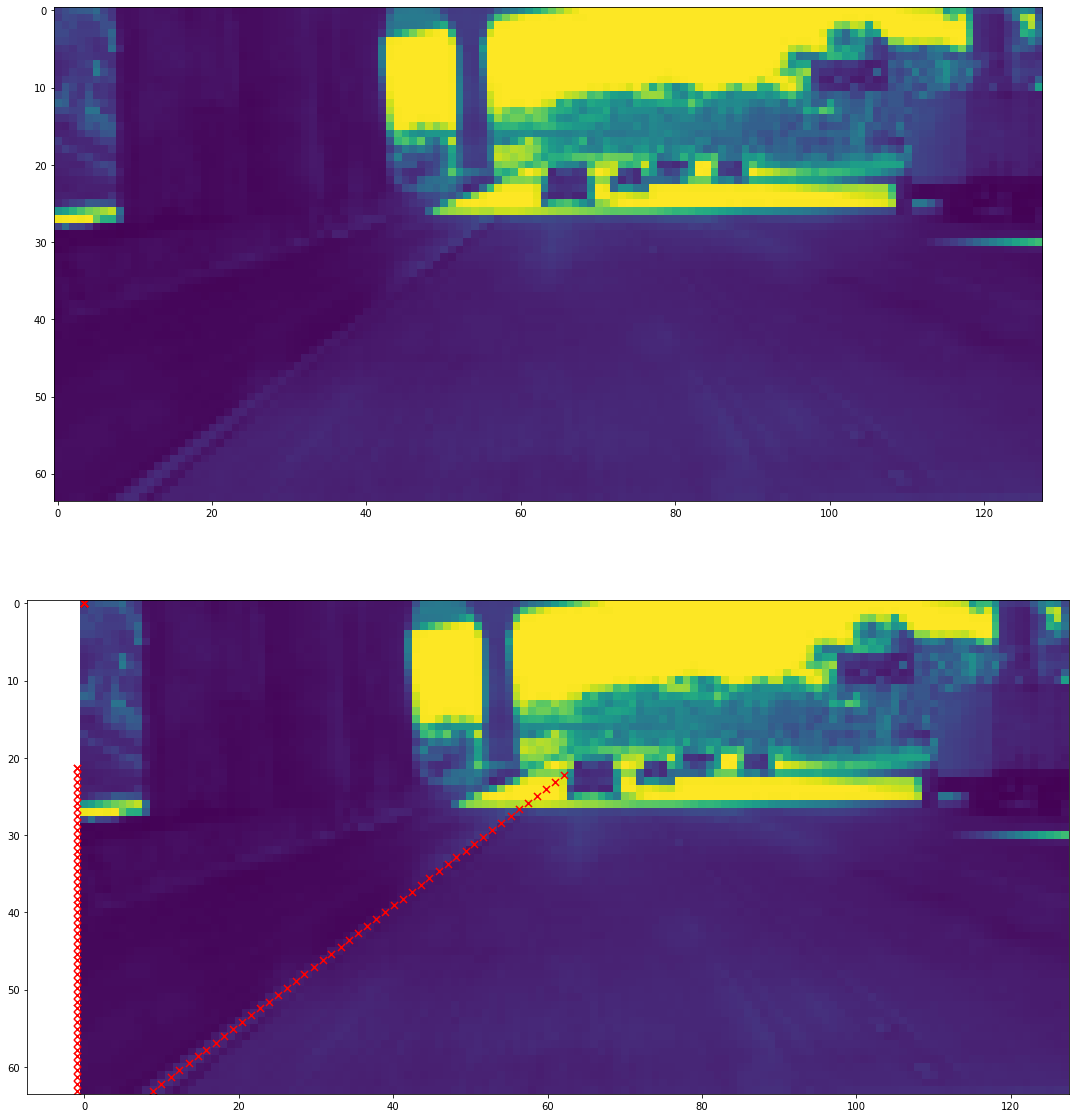

In [9]:
plt.figure(figsize = (20,20))
plt.subplot(2,1,1)
plt.imshow(image)# + np.array([0.485, 0.456, 0.406]))
plt.subplot(2,1,2)
plt.imshow(image) #+ np.array([0.485, 0.456, 0.406]))
for i in range(lane_cnt):
    plt.scatter(lane_pair[i][0,:], lane_pair[i][1,:], marker='x',s=50, color='red')
plt.show()

In [10]:
batch_size = 6 #6
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=4, drop_last = True)
val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=False, num_workers=4, drop_last = True)

In [11]:
model = HNet()
model.cuda();
#init_all(model, torch.nn.init.constant_, 0.1) 
model.load_state_dict(torch.load('best_weights/model_b1_hnet_0.07057_23.pkl'))

<All keys matched successfully>

In [12]:
epoch = 200
optimizer = optim.SGD(model.parameters(), lr=5e-4)

### Simple train loop & train

In [ ]:
for ep in range(epoch):
    bgloss = []
    model.train()
    for img, label in tqdm(train_loader):
        img = torch.FloatTensor(img).cuda()
          
        gt_labels = torch.FloatTensor(label).cuda()
        out = model(img)
        
        loss_fn = HNetLoss()
        loss = loss_fn.hnet_loss_two_lines(gt_labels,out)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        bgloss.append(loss.cpu().detach().numpy())
        mn_loss = np.mean(bgloss)
    model.eval()
    with torch.no_grad():
        val_loss = []
        for img, label in tqdm(val_loader):
            img = torch.FloatTensor(img).cuda()

            gt_labels = torch.FloatTensor(label).cuda()
            out = model(img)

            loss_fn = HNetLoss()
            loss = loss_fn.hnet_loss_two_lines(gt_labels,out)
            val_loss.append(loss.cpu().detach().numpy())
        
            val_mn_loss = np.mean(val_loss)
        
    print('Epoch', ep, 'Train_Loss', mn_loss,'Val Losss', val_mn_loss)
    torch.save(model.state_dict(),os.path.join('./hnets/','model_b1_hnet_{:.5f}_{}.pkl'.format(val_mn_loss,ep)))


Epoch 0 Train_Loss 0.3197373189660902 Val Losss 4.4622167807753925



Epoch 1 Train_Loss 0.30906172998614456 Val Losss 1.9387075163231784



Epoch 2 Train_Loss 0.30886512388311305 Val Losss 0.9923011532336489



Epoch 3 Train_Loss 0.3305273595322653 Val Losss 0.5241945667069817



Epoch 4 Train_Loss 0.2956120908494225 Val Losss 0.36465862514971736



Epoch 5 Train_Loss 0.3374214437829953 Val Losss 0.5058134110981981



Epoch 6 Train_Loss 0.2713524593199618 Val Losss 0.251902672348286



Epoch 7 Train_Loss 0.26891220400150073 Val Losss 0.2231171167612347



Epoch 8 Train_Loss 0.2707962001534938 Val Losss 0.561617152283105



Epoch 9 Train_Loss 0.26923569616048165 Val Losss 1.0959036842397423



Epoch 10 Train_Loss 0.2707827491023934 Val Losss 0.3227456851042329



Epoch 11 Train_Loss 0.26963092480821615 Val Losss 0.30984578580621125



Epoch 12 Train_Loss 0.26948541749731847 Val Losss 0.5410484397858462



Epoch 13 Train_Loss 0.26862140812811114 Val Losss 0.273055298429266



Epoch 14 Train_Loss 0.27226998708842737 Val Losss 0.26135944140940887



Epoch 15 Train_Loss 0.269093052793629 Val Losss 0.23530721889895018



Epoch 16 Train_Loss 0.27032037968353484 Val Losss 0.2613135874132101



Epoch 17 Train_Loss 0.27043244136572114 Val Losss 0.28581358830587245



Epoch 18 Train_Loss 0.2708662374628018 Val Losss 0.22289911512043004



Epoch 19 Train_Loss 0.2693930398737284 Val Losss 0.5656650219063629



Epoch 20 Train_Loss 0.26820819982741306 Val Losss 0.22163408045035307



Epoch 21 Train_Loss 0.27463297326642455 Val Losss 0.27098861272631064



Epoch 22 Train_Loss 0.26915981236551545 Val Losss 0.29765590178649626



Epoch 23 Train_Loss 0.2699615957968859 Val Losss 0.24859317216353644



Epoch 24 Train_Loss 0.26924381337530334 Val Losss 0.22473469884135358



Epoch 25 Train_Loss 0.26863608069219985 Val Losss 0.2230561710498565



Epoch 26 Train_Loss 0.2683022813377242 Val Losss 0.22420045841812816



Epoch 27 Train_Loss 0.27062483976776014 Val Losss 0.22759515484050144



Epoch 28 Train_Loss 0.27271722980437463 Val Losss 0.23427530831420446



Epoch 29 Train_Loss 0.27090332756322566 Val Losss 0.22238630132203105



Epoch 30 Train_Loss 0.26810258248098623 Val Losss 0.23793915412873481



Epoch 31 Train_Loss 0.26835968309524977 Val Losss 0.24390146568702833



Epoch 32 Train_Loss 0.2680456954678624 Val Losss 0.2379708013603792



Epoch 33 Train_Loss 0.26802948081018685 Val Losss 0.23229965092502902



Epoch 34 Train_Loss 0.2684511775020266 Val Losss 0.23239143259639083



Epoch 35 Train_Loss 0.2697423408188053 Val Losss 0.2329679609525253



Epoch 36 Train_Loss 0.2680098532771028 Val Losss 0.22163597507088412



Epoch 37 Train_Loss 0.2685739535983366 Val Losss 0.2614506529512775



Epoch 38 Train_Loss 0.26810005134497095 Val Losss 0.2215189521486845



Epoch 39 Train_Loss 0.2687891282712456 Val Losss 0.2272302002798373



Epoch 40 Train_Loss 0.2686994936544677 Val Losss 0.22273749941323012



Epoch 41 Train_Loss 0.26804836372207647 Val Losss 0.23764392094441764



Epoch 42 Train_Loss 0.27063918967916356 Val Losss 0.22460981668581148



Epoch 43 Train_Loss 0.26836457721032025 Val Losss 0.22166115572716388



Epoch 44 Train_Loss 0.2679653644847741 Val Losss 0.23164420743151096



Epoch 45 Train_Loss 0.2680173964396611 Val Losss 0.22168863497577834



Epoch 46 Train_Loss 0.26831492738393947 Val Losss 0.22193640304252182



Epoch 47 Train_Loss 0.2684069448808583 Val Losss 0.22533392628490018



Epoch 48 Train_Loss 0.26840079218097823 Val Losss 0.2291164110333452



Epoch 49 Train_Loss 0.26848323668136864 Val Losss 0.22143005159503207



Epoch 50 Train_Loss 0.2683052019958752 Val Losss 0.22138672203322385



Epoch 51 Train_Loss 0.2682534924831857 Val Losss 0.2236928484924301



Epoch 52 Train_Loss 0.2683231532972912 Val Losss 0.22150062685719954



Epoch 53 Train_Loss 0.2681115375341606 Val Losss 0.22923721120768417



Epoch 54 Train_Loss 0.2681231304297064 Val Losss 0.2224350384667799



Epoch 55 Train_Loss 0.26826494264419865 Val Losss 0.22995669890967702



Epoch 56 Train_Loss 0.2680655263126692 Val Losss 0.22733618935935584



Epoch 57 Train_Loss 0.2682101144364963 Val Losss 0.2211539265933729



Epoch 58 Train_Loss 0.2688649855321018 Val Losss 0.23115309316255916



Epoch 59 Train_Loss 0.2680601885995966 Val Losss 0.22157199934541016



Epoch 60 Train_Loss 0.268185220262104 Val Losss 0.23452100130819112



Epoch 61 Train_Loss 0.26802917608703286 Val Losss 0.22108907774390452



Epoch 62 Train_Loss 0.2680305888757257 Val Losss 0.24778278863654618



Epoch 63 Train_Loss 0.26807323636965363 Val Losss 0.22548510237120076



Epoch 64 Train_Loss 0.26800057731390553 Val Losss 0.22469339256968374



Epoch 65 Train_Loss 0.26883287808577483 Val Losss 0.23017950329875256



Epoch 66 Train_Loss 0.2679929255127479 Val Losss 0.2239761560407322



Epoch 67 Train_Loss 0.2679890613102946 Val Losss 0.22103228273690095



Epoch 68 Train_Loss 0.2683855749341038 Val Losss 0.22490246658702331



Epoch 69 Train_Loss 0.26838016900689354 Val Losss 0.2235353251000251



Epoch 70 Train_Loss 0.26799436846973396 Val Losss 0.23406961099158907



Epoch 71 Train_Loss 0.26827748417132646 Val Losss 0.2384782280244372



Epoch 72 Train_Loss 0.26805873293088506 Val Losss 0.22383742326159073



Epoch 73 Train_Loss 0.26795332049247206 Val Losss 0.22833009341931346



Epoch 74 Train_Loss 0.2679761051164304 Val Losss 0.23521617168091155



Epoch 75 Train_Loss 0.2680044383168273 Val Losss 0.2229137392128545



Epoch 76 Train_Loss 0.2679814418148561 Val Losss 0.22477968553768732



Epoch 77 Train_Loss 0.26797495737879096 Val Losss 0.2210922634626718



Epoch 78 Train_Loss 0.26797618670832923 Val Losss 0.2368511861328051



Epoch 79 Train_Loss 0.2683305791815508 Val Losss 0.2210228824803784



Epoch 80 Train_Loss 0.26790468220032493 Val Losss 0.22146615492080327



Epoch 81 Train_Loss 0.26813469264434775 Val Losss 0.24070076469180796


### Check Homography with realtion to provided R

In [ ]:
model.load_state_dict(torch.load('best_weights/model_b1_hnet_0.07057_23.pkl'))
model.eval();

In [ ]:
random_sample = dataset[random.randint(0,len(val_set)-1)]
image = random_sample[0][0]
lane_pair = random_sample[1] 
lane_cnt = len(lane_pair)

In [ ]:
plt.imshow(image)

In [ ]:
x = torch.FloatTensor(random_sample[0]).cuda()
x = x.unsqueeze(0)

In [ ]:
out = model(x.cuda())
print(out)

In [ ]:
out.size()

In [ ]:
transformation_coeffcient = torch.cat([out[0], torch.tensor([1.0], dtype=torch.float64).cuda()], -1).type(torch.float64)
mult = torch.tensor([1e-02, 1e-01, 1e-01,  1e-01, 1e-01,1e-03,1]).type(torch.float32).cuda()
transformation_coeffcient = transformation_coeffcient*mult
print(transformation_coeffcient)
H_indices = torch.tensor([[0], [1], [2], [4], [5], [7], [8]], requires_grad=False).cuda()
R = torch.tensor([-2.0484e-01,     -1.7122e+01,     3.7991e+02,     -1.6969e+01,     3.7068e+02,     -4.6739e-02,  0.0000e+00]).cuda()
result = torch.zeros(9, dtype=torch.float64).cuda()
result[H_indices[:, 0]] = R + transformation_coeffcient 
H = torch.reshape(result, shape=[3, 3])

In [ ]:
print(H)

In [ ]:
R = torch.Tensor([[-2.0484e-01, -1.7122e+01,  3.7991e+02],
                  [ 0.0000e+00, -1.6969e+01,  3.7068e+02],
                  [ 0.0000e+00, -4.6739e-02,  1.0000e+00]]).cuda()

In [ ]:
gt = torch.FloatTensor(random_sample[1][1]).cuda()
gt = gt.T
gt = gt[gt[:,0]>0]
gt = torch.cat((gt, torch.ones(gt.size(0),1).cuda()),1)
loss_check = HNetLoss()
loss = loss_check.hnet_loss_single(gt,out.detach())
fixed = torch.tensor([0, 0, 0, 0, 0,0]).type(torch.float32).cuda()
loss_fixed = loss_check.hnet_loss_single(gt,fixed)

print("Loss HNet",loss)
print("Loss fixed", loss_fixed)

#### sometimes HNet works better! and sometimes not..

In [ ]:
H.size()

In [ ]:
img = cv2.resize(image, (128, 64), interpolation=cv2.INTER_LINEAR)
plt.figure(figsize = (10,10))
plt.imshow(cv2.warpPerspective(img, H.detach().cpu().numpy(), dsize=(700, 700)))

In [ ]:
plt.figure(figsize = (10,10))
plt.imshow(cv2.warpPerspective(image, R.detach().cpu().numpy(), dsize=(700, 700)))